# Tensorflow基础

## 一、什么是Tensorflow


<img src="tensorflow-logo.gif" >

>Tensorflow是一个符号式编程的框架。由谷歌大脑开发，2015年开源，是目前业界用的最广泛的深度学习框架之一。该框架可广泛的用于各个终端，服务器端，移动端和嵌入式端等。

一个Tensorflow程序通常包含两个部分：

- 构建计算图
- 执行计算图

下面来看一个最简单的Tensorflow程序的例子

In [2]:
import warnings
warnings.filterwarnings('ignore')
# 导入tensorflow包
import tensorflow as tf
# 构建计算图
g1 = tf.get_default_graph()
w = tf.constant(2.)
y = w+2
# 加载会话，执行计算图
with tf.Session(graph = g1) as sess:
    print(sess.run([y]))
# 清空图
tf.reset_default_graph()

[4.0]


---

## 二、Tensorflow中的基本概念

Tensorflow中有一些基本概念必须掌握清楚：

- 图(graph)

- 会话(session)

- 操作(op)

- 张量(tensor)

- 变量(variable)

- 占位符(placeholder)

- 计算路径

- tf.assgin

### 2.1 什么是图(graph)

图由节点和边组成，需要注意的是这个图的概念和和理论上的计算图不一样。在Tensorflow中边表示流动的方向，节点表示**张量**和**操作**。张量和操作的概念在后面会进一步讲解。（课上讲的计算图，边表示操作，节点表示变量）

>注意：计算图只包含操作，不包含结果(没有实际的运算过程)

![tesnor-flow](tensors_flowing.gif)

---

当你打开Tensorflow的时候，tf会自动为你分配一个默认的图。你所有构件图的操作都会在这个默认的图上进行操作。

In [4]:
# 默认的图上进行操作
g0 = tf.get_default_graph()
# 这是图的一个构件
x0 = tf.Variable(1)
# 查看这个图中的构件属不属于这个图
x0.graph is g0

True

In [5]:
# 在不同的图上进行不同的操作
g1 = tf.Graph()
g2 = tf.Graph()
# 在g1这个图上进行操作
with g1.as_default():
    x1 = tf.Variable(1)   
# 在g2这个图上进行操作
with g2.as_default():
    x2 = tf.Variable(1)
print(x1.graph is g2)
print(x2.graph is g2)

False
True


有时候需要查看一个图上有哪些操作节点：

In [6]:
# 查看某一个图上的操作节点
g1.get_operations()

[<tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>]

在构建图的时候，由于重复构建操作导致图出错，所以在构建图的时候一定记得对默认的图进行清空。

In [7]:
g_now = tf.get_default_graph()

In [8]:
g_now.get_operations()

[<tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>]

In [9]:
tf.reset_default_graph()

In [10]:
g_now = tf.get_default_graph()

In [11]:
g_now.get_operations()

[]

#### 扩展
> Tensorflow是一种静态图的深度学习框架，Pytorch是一种动态图的深度学习框架。Tensorflow2.0引入了动态图机制，未来的框架是即可静态图也可动态图，两者可相互切换。

---

## 2.2 什么是会话(session)

会话的作用是处理内容和优化，使我们能够实际执行计算图指定的计算。
计算图是要执行的计算模版，会话通过分配计算资源来执行计算图的计算。

>图的构建是几乎不占资源的，但是会话会占用很多资源

来看一个简单的例子

In [16]:
# 构建图（在默认的图上构建）
w = tf.constant(3)
x = w+2
y = x+5
z = x*3
# 执行会话
with tf.Session(graph=tf.get_default_graph()) as sess:
    print(sess.run([x]))
    print(sess.run([z])) 
    print(x.eval())

[5]
[15]
5


<img src="1.png" >

#### 注意：

1. eval( )等价于sess.run( )。
2. tensorflow会自动检测依赖关系。
3. 除了variable变量其余计算结果每次计算完后会释放。variable在session执行完后释放。
4. 重复计算的问题。

In [4]:
# 解决重复计算的问题
# 构建图
w = tf.constant(3)
x = w+2
y = x+5
z = x*3
# 执行会话
with tf.Session(graph=tf.get_default_graph()) as sess:
    print(sess.run([x,z]))
    #print(sess.run[x])
    #print(sess.run(z))

[5, 15]


每次使用上下文管理器太麻烦，于是我们有互动的会话，互动的会话就像ipython一样，实时反馈。实时反馈的目的是为了简单进行调动

In [5]:
# 注意需要手动关闭
sess = tf.InteractiveSession()
print(x.eval())
print(sess.run(x))

5
5


In [14]:
sess.close()
# print(sess.run([x]))

---

## 2.3 什么是张量(tensor)

操作的输入和输出就是张量，Tensorflow直观翻译，就是张量流动的意思。

- 标量(scalar)
- 向量(vector)
- 矩阵(matrix)
- 张量(tensor)

在tensorflow中张量主要有三个来源：

- constant
- variable
- placeholder

这里我们只讨论contant，后面两种在后面小节会详细讨论。

`constant`的生存周期在会话内。

`tf.constant`生成常量的意思（常量意味着不可变）。


In [6]:
import numpy as np
a = tf.constant(np.arange(12).reshape(3,4),dtype=tf.float32)
with tf.Session(graph=tf.get_default_graph()) as sess:
    print(sess.run([a]))
tf.reset_default_graph()

[array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)]


In [9]:
a = tf.constant(0.0,shape=(3,2,6),dtype=tf.float32)
with tf.Session() as sess:
    print(sess.run([a]))
tf.reset_default_graph()

[array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]], dtype=float32)]


---

## 2.4 什么是变量(variable)

在神经网络中，我们需要一种能充当神经网络参数的角色。他可以被保存，也可被更新。这种角色称之为变量。变量也是一种张量。variable这种张量在session中会一直保持，不会被释放，可以被改变，直到session被关闭。

> 注意：变量一定需要初始化。（神经网络参数也需要初始化！）

变量的初始化主要使用下面的代码，这样就不需要一个一个的初始化了。

```python
# 这个实际上是一个op包含了所有的变量。
......
init = tf.global_variables_initializer()
......
sess.run(init)
```

- 其中`init`构建在图中。
- sess.run(init)在session中执行。

---

在Tensorflow中主要通过`tf.Variable`和`tf.get_variable`两个接口来实现变量。两者有很大的区别，建议大家尽量使用`tf.get_variable`

### tf.Variable的使用

**1.** 每次调用得到的都是不同的变量，即使使用了相同的变量名，在底层实现的时候还是会为变量创建不同的别名。

In [10]:
var1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0),name='var',dtype=tf.float32)
var2 = tf.Variable(initial_value=[2],name='var',dtype=tf.float32)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(var1.name, sess.run(var1))
    print(var2.name, sess.run(var2))

Instructions for updating:
Colocations handled automatically by placer.
var:0 [0.6459048]
var_1:0 [2.]


**2.** 会受`tf.name_scope`环境的影响，即会在前面加上`name_scope`的空间前缀。

In [20]:
tf.reset_default_graph()
with tf.name_scope('var_b_scope'):
    var1 = tf.Variable(name='var', initial_value=[2], dtype=tf.float32)
    var2 = tf.Variable(name='var', initial_value=[2], dtype=tf.float32)
with tf.name_scope('var_a_scope'):
    var3 = tf.Variable(name='var', initial_value=[2], dtype=tf.float32)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(var1.name, sess.run(var1))
    print(var2.name, sess.run(var2))
    print(var3.name, sess.run(var3))

var_b_scope/var:0 [2.]
var_b_scope/var_1:0 [2.]
var_a_scope/var:0 [2.]


**3.** `Variable()`创建时直接指定初始化的方式，还可以把其他变量的初始值作为初始值。

In [32]:
var2 = tf.Variable(var1.initialized_value())

---

### tf.get_variable的使用

**1.** 只会创建一个同名变量，如果想共享变量，需指定`reuse=True`，否则多次创建会报错，使用`reuse=True`（第一次创建的时候不用，后面共享的时候声明）,可以动态的修改某个`scope`的共享属性。

In [13]:
tf.reset_default_graph()

def func(x):
    weight = tf.get_variable(name = "weight",initializer = tf.random_normal([1]))  
    bias = tf.get_variable(name="bias",initializer = tf.zeros([1]))  
    return tf.add(tf.multiply(weight, x), bias)

result1 = func(1)
#result2 = func(2)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run([result1]))
   # print(sess.run(result2))

[array([-0.43011189], dtype=float32)]


In [16]:
tf.reset_default_graph()
def func(x,reuse):
    with tf.variable_scope('neuron',reuse=reuse):
        weight = tf.get_variable(name = "weight",initializer = tf.random_normal([1]))  
        bias = tf.get_variable(name="bias",initializer = tf.zeros([1]))  
    return tf.add(tf.multiply(weight, x), bias)
result1 = func(1,reuse=False)
result2 = func(2,reuse=True)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run([result1]))
    print(sess.run([result2]))

[array([-1.785076], dtype=float32)]
[array([-3.570152], dtype=float32)]


**2.** 不受`with tf.name_scope`的影响(注：是`name_scope`，不是`variable_scope`，`tf.Variable`和`tf.get_variable`都会受`variable_scope`影响）)

In [17]:
tf.reset_default_graph()
with tf.name_scope('var_a_scope'):
    var1 = tf.get_variable(name='var', shape=[1], dtype=tf.float32)
    var2 = tf.get_variable(name='var1', shape=[1], dtype=tf.float32)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(var1.name, sess.run(var1))
    print(var2.name, sess.run(var2))

var:0 [0.6803905]
var1:0 [0.02682829]


**3.** 初始化方法

In [58]:
conv1_weights = tf.get_variable(name="conv1_weights", shape=[5, 5, 3, 3], dtype=tf.float32, initializer=tf.truncated_normal_initializer())
conv1_biases = tf.get_variable(name='conv1_biases', shape=[3], dtype=tf.float32, initializer=tf.zeros_initializer())

**4.** `with tf.variable_scope('scope_name")`会进行“累加”，每调用一次就会给里面的所有变量添加一次前缀，叠加顺序是外层先调用的在前，后调用的在后

In [38]:
tf.reset_default_graph()
def my_image_filter(input_images):
    with tf.variable_scope('scope_a'):
        conv1_weights = tf.get_variable(name="conv1_weights", shape=[5, 5, 3, 3], dtype=tf.float32, \
                                        initializer=tf.truncated_normal_initializer())
        conv1_biases = tf.get_variable(name='conv1_biases', shape=[3], dtype=tf.float32, \
                                        initializer=tf.zeros_initializer())
        conv1 = tf.nn.conv2d(input_images, conv1_weights, strides=[1, 1, 1, 1], padding='SAME')
        print(conv1_weights.name)
        return  tf.nn.relu(conv1 + conv1_biases)

image1 = np.random.random(3*5*5).reshape(1, 5, 5, 3).astype(np.float32)
image2 = np.random.random(3*5*5).reshape(1, 5, 5, 3).astype(np.float32)
with tf.variable_scope("image_filters") as scope:
    result1 = my_image_filter(image1)
    print(result1.name)

image_filters/scope_a/conv1_weights:0
image_filters/scope_a/Relu:0


---

## 2.5 什么是占位符(placeholder)

我们需要让计算图能接受外面来的数据，如何接受外面的数据就是通过占位符实现的。简单点理解就是神经网络需要输入的数据就是由占位符来输入的。为什么叫占位符，因为`BatchSize`是占了个位置，占好位置后，输入的数据在不断变化。
> 注意：占位符也是一种`tensor`。输入的数据我们一般输入`numpy`的`ndarray`。

In [22]:
import numpy as np
ph = tf.placeholder(dtype=tf.float32,shape =(None,3))
add_op = tf.add(ph,1)

with tf.Session() as sess:
    #print(sess.run(ph,feed_dict={ph:np.random.rand(4,3)}))
    print(sess.run(add_op,feed_dict={ph:np.random.rand(5,3)}))

[[1.7917175 1.6017565 1.9925709]
 [1.2930344 1.2192346 1.210482 ]
 [1.4833066 1.4074428 1.2816691]
 [1.4580355 1.621912  1.4550905]
 [1.6928124 1.7759385 1.3649117]]


---

## 2.6 什么是计算路径

计算路径是指如果计算的节点具有依赖关系，那么我们就会计算这些节点，沿着父节点找。
TensorFlow仅通过必需的节点自动进行计算这一事实是该框架的一个巨大优势。如果计算图非常大并且有许多不必要的节点，那么它可以节省大量调用的运行时间。它允许我们构建大型的多用途计算图，这些计算图使用单个共享的核心节点集合，并根据所采取的不同计算路径去做不同的事情

In [27]:
# tensorflow会自动寻找依赖关系
# 如果去掉feed_dict会报错
tf.reset_default_graph()

ph = tf.placeholder(tf.int32)

three_node = tf.constant(3)

sum_node = ph + three_node

with tf.Session() as sess:
    #print(sess.run(three_node))
    print(sess.run(sum_node,feed_dict={ph:15}))

18


---

## 2.7、一个重要的操作tf.assign


`tf.assign(target, value)`表示把`value`值赋值给`target`。`target`必须是一个可变的`tensor`(variable)可以没被初始化。`value`必须要有和`target`相同的数据类型和形状。

思考一下如下的操作需要用到`tf.assign`吗？如果要用，对谁用？

$\theta = \theta - \beta \nabla L(\theta)$

---

## 三、实现线性回归

线性回归可以看作是最简单的神经网络。我们使用4种方法来实现一个线性回归。

- 解析法。
- 人工求梯度。
- 使用低阶API求梯度。
- 使用高阶API求梯度。

In [28]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess: 
    theta_value = theta.eval()
    print(theta_value)

[[-3.74659576e+01]
 [ 4.35208052e-01]
 [ 9.34183039e-03]
 [-1.05619654e-01]
 [ 6.38267040e-01]
 [-4.28281601e-06]
 [-3.77140474e-03]
 [-4.26884502e-01]
 [-4.40567464e-01]]


/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
import time
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

data = housing.data
scaled_housing_data_plus_bias = (data-np.mean(data,axis=0))/np.std(data,axis=0)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data_plus_bias]

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")



theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


gradients = 2./m * tf.matmul(tf.transpose(X), error)

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer() 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch", epoch, "MSE =", mse.eval())
            time.sleep(1)
        sess.run(training_op)
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 10.076755
Epoch 100 MSE = 0.7233888
Epoch 200 MSE = 0.5737729
Epoch 300 MSE = 0.5593785
Epoch 400 MSE = 0.5504173
Epoch 500 MSE = 0.5438431
Epoch 600 MSE = 0.53898513
Epoch 700 MSE = 0.5353839
Epoch 800 MSE = 0.5327053
Epoch 900 MSE = 0.53070563
[[ 2.0685523 ]
 [ 0.8501739 ]
 [ 0.14335446]
 [-0.2655531 ]
 [ 0.28865078]
 [ 0.00418023]
 [-0.04184572]
 [-0.70123595]
 [-0.67240614]]


In [41]:
tf.reset_default_graph()
n_epochs = 1000
learning_rate = 0.01

data = housing.data
scaled_housing_data_plus_bias = (data-np.mean(data,axis=0))/np.std(data,axis=0)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data_plus_bias]
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse,theta)

training_op = tf.assign(theta, theta - learning_rate * gradients[0])
init = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch", epoch, "MSE =", mse.eval())
            time.sleep(1)
        sess.run(training_op)
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 7.4708076
Epoch 100 MSE = 0.8945591
Epoch 200 MSE = 0.72462505
Epoch 300 MSE = 0.66868955
Epoch 400 MSE = 0.629366
Epoch 500 MSE = 0.60087246
Epoch 600 MSE = 0.5801903
Epoch 700 MSE = 0.56516325
Epoch 800 MSE = 0.55423355
Epoch 900 MSE = 0.5462741
[[ 2.0685525 ]
 [ 0.8148505 ]
 [ 0.1622447 ]
 [-0.1510959 ]
 [ 0.1730188 ]
 [ 0.01151067]
 [-0.04269051]
 [-0.5967006 ]
 [-0.5614512 ]]


In [42]:
tf.reset_default_graph()
n_epochs = 1000
learning_rate = 0.01

data = housing.data
scaled_housing_data_plus_bias = (data-np.mean(data,axis=0))/np.std(data,axis=0)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data_plus_bias]
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch", epoch, "MSE =", mse.eval())
            time.sleep(1)
        sess.run(training_op)
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 8.762407
Epoch 100 MSE = 0.5314667
Epoch 200 MSE = 0.52459747
Epoch 300 MSE = 0.5243461
Epoch 400 MSE = 0.5243242
Epoch 500 MSE = 0.52432144
Epoch 600 MSE = 0.524321
Epoch 700 MSE = 0.52432096
Epoch 800 MSE = 0.524321
Epoch 900 MSE = 0.524321
[[ 2.0685577 ]
 [ 0.8296145 ]
 [ 0.11875065]
 [-0.2655177 ]
 [ 0.30568862]
 [-0.00450329]
 [-0.03932609]
 [-0.8998968 ]
 [-0.8705517 ]]


---

## 四、保存和恢复模型

在模型的参数学习过程中，我们需要根据情况保存模型。根据前面的讲解知道神经网络的参数存储在`variable`中，`variable`的参数在`session`关闭后就会释放。所以我们需要在`session`打开的时候保存模型的参数。

保存模型参数类似于`checkpoint`(切片快照)。在迭代的过程中，选择某一次快照一下然后保存到硬盘中。

> 注意：模型保存在硬盘中有四个文件

In [30]:
tf.reset_default_graph()
theta = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0), name="theta")
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 1000
with tf.Session() as sess: 
    sess.run(init)
    for epoch in range(n_epochs):
        # checkpoint every 100 epochs
        if epoch % 100 == 0: 
            saver.save(sess, save_path="./model/my_model.ckpt")
    print(theta.eval())

[[ 0.6585562 ]
 [-0.40244937]
 [ 0.7453103 ]]


我们来查看一下保存的文件：

<img src="checkpoint.png" >

文件中主要保存了两类东西：

1. 计算图(保存在meta文件中)
2. variable的参数(保存在data文件中)

---

所以我们从硬盘中加载回模型有两种方法：

1. 复制之前的代码，生成一摸一样的计算图，然后加载参数。
2. 加载meta文件，将计算图加载回来，然后加载参数。

In [31]:
# 方法一
tf.reset_default_graph()
theta = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0), name="theta")
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess: 
    saver.restore(sess,save_path="./model/my_model.ckpt")
    print(theta.eval())

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
[[ 0.6585562 ]
 [-0.40244937]
 [ 0.7453103 ]]


In [32]:
# 方法二
tf.reset_default_graph()
saver = tf.train.import_meta_graph('./model/my_model.ckpt.meta')
with tf.Session() as sess:
    saver.restore(sess,'./model/my_model.ckpt')

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt


### 4.1 tf.get_collection和tf.add_to_collection

为了方便我们取出不同的operation，我们需要使用tf.add_to_collection和tf.get_collection。

In [33]:
tf.reset_default_graph()
theta = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0), name="theta")
tf.add_to_collection('my_op',theta)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 1000
with tf.Session() as sess: 
    sess.run(init)
    for epoch in range(n_epochs):
        # checkpoint every 100 epochs
        if epoch % 100 == 0: 
            saver.save(sess, save_path="./model/my_model.ckpt")
    print(theta.eval())

[[ 0.86878633]
 [-0.9685254 ]
 [-0.8158989 ]]


In [34]:
tf.reset_default_graph()
saver = tf.train.import_meta_graph('./model/my_model.ckpt.meta')
my_op = tf.get_collection('my_op')
with tf.Session() as sess:
    saver.restore(sess,'./model/my_model.ckpt')
    print(sess.run(my_op[0]))

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
[[ 0.86878633]
 [-0.9685254 ]
 [-0.8158989 ]]


In [35]:
my_op

[<tf.Tensor 'theta:0' shape=(3, 1) dtype=float32_ref>]

---

---

## 五、TensorBoard监控

TensorBoard是和TensorFlow配套的一个神经网络可视化的工具。

大致流程如下：

1. 在你创建的图里面，选择你要汇总(summary)的节点。
2. 因为你要对每一个汇总操作,进行sess.run操作，为了方便所以我们需要将所有操作进行汇总。(tf.summary.merge_all())。
3. 在sess中运行上面汇总的操作。
4. 使用tf.summary.FileWriter,将结果写入文件。
5. 使用tensorboard --logdir='path'运行文件。




### 5.1 summary操作

---
```python
#统计标量，比如loss,accuracy，得到时序图
tf.summary.scalar(name,tensor)
```
---

```python
#统计张量，直方图统计，看weights,bias的分布
tf.summary.histogram(name,tensor)
```
---

```python
# 将summary的操作进行汇总
# inputs是个list
# 一个表示部分汇总一个表示全部汇总
merge_some=tf.summary.merge(inputs,collections=None,name=None)
merge_summary=tf.summary.merge_all(key=tf.GraphKeys.SUMMARIES)
```
---

> 注意：上面的操作都是在图的定义中

### 5.2 文件写入操作

---

```python
#写入到硬盘的文件
#这个操作把图写入文件中
file_writer=tf.summary.FileWriter(logdir,graph,flush_secs)
```
---

```python
merge=sess.run(merge_some)
file_writer.add_summary(merge,step)
```

注意，该操作是在sess会话中运行

```python
[...]
for batch_index in range(n_batches):
    X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size) 
    if batch_index % 10 == 0:
        summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
        step = epoch * n_batches + batch_index
        file_writer.add_summary(summary_str, step)
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
[...]
```


 ---
### 5.3 运行tensorboard

```bash
#path为目录地址
tensorboard --logdir='path'
```

```bash
#关于端口被占用的解决方法
#默认使用的是6006端口
lsof -i:6006
kill -9 4969
```


```
#在浏览器中输入
 http://0.0.0.0:6006/ (or http://localhost:6006/)
```

6006倒过来就是goog的意思


In [4]:
# tensorboard举例
import tensorflow as tf
import numpy as np
from datetime import datetime
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
m, n = housing.data.shape

tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

data = housing.data
scaled_housing_data_plus_bias = (data-np.mean(data,axis=0))/np.std(data,axis=0)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data_plus_bias]
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

# 定义写入的东西
tf.summary.scalar('mse',mse)
tf.summary.histogram('theta',theta)

# 进行汇总
merge_summary=tf.summary.merge_all(key=tf.GraphKeys.SUMMARIES)

# 定义写入地址
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
# 打印写入的地址方便tensorboard使用
print(logdir)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer() 
with tf.Session() as sess:
    
    sess.run(init)
    # 定义写的文件（打开）
    file_writer=tf.summary.FileWriter(logdir,sess.graph)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
         # 计算写入的值
        summary_str = merge_summary.eval()
        file_writer.add_summary(summary_str, epoch)
    best_theta = theta.eval()
    print(best_theta)
file_writer.close()

Instructions for updating:
Colocations handled automatically by placer.
tf_logs/run-20190831063428/
Epoch 0 MSE = 7.0744567
Epoch 100 MSE = 0.7813135
Epoch 200 MSE = 0.651434
Epoch 300 MSE = 0.62424386
Epoch 400 MSE = 0.60432595
Epoch 500 MSE = 0.5886629
Epoch 600 MSE = 0.5762598
Epoch 700 MSE = 0.56639147
Epoch 800 MSE = 0.5585053
Epoch 900 MSE = 0.55217683
[[ 2.0685527 ]
 [ 0.9574246 ]
 [ 0.16366452]
 [-0.46780983]
 [ 0.4557338 ]
 [ 0.01017649]
 [-0.04585057]
 [-0.4524668 ]
 [-0.4361016 ]]


---

### 六、 实现第一个神经网络

任务：使用mnist数据集来实现图像的分类：

<img src="mnist.png" style="zoom:50%" >

输入是以下的一张图片：

<img src="0.png" style="zoom:100%" >

等价于一个矩阵：

<img src="0_matrix.png" style="zoom:15%" >

In [89]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import sys


tf.reset_default_graph()
epochs = 15
batch_size = 100
total_sum = 0
epoch = 0

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
train_num = mnist.train.num_examples



input_data = tf.placeholder(tf.float32,shape=(None,784))
input_label = tf.placeholder(tf.float32,shape=(None,10))

w1 = tf.get_variable(shape=(784,64),name='hidden_1_w')
b1 = tf.get_variable(shape=(64),initializer=tf.zeros_initializer(),name='hidden_1_b')

w2 = tf.get_variable(shape=(64,32),name='hidden_2_w')
b2 = tf.get_variable(shape=(32),initializer=tf.zeros_initializer(),name='hidden_2_b')

w3 = tf.get_variable(shape=(32,10),name='layer_output')

#logit层
output = tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(input_data,w1)+b1),w2)+b2),w3)

loss = tf.losses.softmax_cross_entropy(input_label,output)

#opt = tf.train.GradientDescentOptimizer(learning_rate=0.1)
opt = tf.train.AdamOptimizer()

train_op = opt.minimize(loss)

# 测试评估
correct_pred = tf.equal(tf.argmax(input_label,axis=1),tf.argmax(output,axis=1))
acc = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

tf.add_to_collection('my_op',input_data)
tf.add_to_collection('my_op',output)
tf.add_to_collection('my_op',loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run([init])
    test_data = mnist.test.images
    test_label = mnist.test.labels
    while epoch<epochs:
        data,label=mnist.train.next_batch(batch_size)
        data = data.reshape(-1,784)
        total_sum+=batch_size
        sess.run([train_op],feed_dict={input_data:data,input_label:label})
        if total_sum//train_num>epoch:
            epoch = total_sum//train_num
            loss_val = sess.run([loss],feed_dict={input_data:data,input_label:label})
            acc_test = sess.run([acc],feed_dict={input_data:test_data,input_label:test_label})
            saver.save(sess, save_path="./model/my_model.ckpt")
            print('epoch:{},train_loss:{:.4f},test_acc:{:.4f}'.format(epoch,loss_val[0],acc_test[0]))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch:1,train_loss:0.3265,test_acc:0.9439
epoch:2,train_loss:0.2267,test_acc:0.9543
epoch:3,train_loss:0.0779,test_acc:0.9606
epoch:4,train_loss:0.0871,test_acc:0.9666
epoch:5,train_loss:0.0362,test_acc:0.9668
epoch:6,train_loss:0.1314,test_acc:0.9693
epoch:7,train_loss:0.0297,test_acc:0.9705
epoch:8,train_loss:0.0319,test_acc:0.9710
epoch:9,train_loss:0.0348,test_acc:0.9725
epoch:10,train_loss:0.0344,test_acc:0.9730
epoch:11,train_loss:0.0269,test_acc:0.9727
epoch:12,train_loss:0.0270,test_acc:0.9744
epoch:13,train_loss:0.0081,test_acc:0.9711
epoch:14,train_loss:0.0191,test_acc:0.9727
epoch:15,train_loss:0.0168,test_acc:0.9706


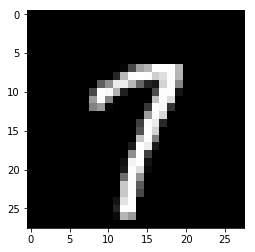

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline
index = 666
plt.imshow(test_data[index].reshape(28,28),cmap='gray')

In [87]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
saver = tf.train.import_meta_graph('./model/my_model.ckpt.meta')
saver.restore(sess,"./model/my_model.ckpt")
input_tensor = tf.get_collection('my_op')[0]
output_tensor = tf.get_collection('my_op')[1]

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt


In [88]:
np.argmax(sess.run(output_tensor,feed_dict={input_tensor:np.expand_dims(test_data[index],axis=0)}))

7